# Survey Auswertung

In [154]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors


In [7]:
# define path 
path = "C:\\Users\\m-bau\\Dokumente\\Studium\\Master\\3. Semester\\Data Science Project\\webscraping\\"

In [176]:
efs = pd.read_csv(path + "efs_list.csv")
efs = efs.iloc[:,[0,2]]

In [177]:
efs.head()

,List-ID,Name
0,1,Germaniaplatz_60385.jpeg
1,2,Usinger_Strasse_60389.jpeg
2,3,Langenselbolder_Strasse_60386.jpeg
3,4,Vogelstrasse_60528.jpeg
4,5,Bleichstrasse_60313.jpeg


The raw file from unipark export.csv uses " ";" " as separator which seems complicated to import, therefore it is first converted into a .txt file an then imported.

In [54]:
raw = pd.read_csv(path + "export.txt", delimiter = "\t")

In [55]:
raw.head()

,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,c_0001,v_51,v_56,...,cleaned,ats,datetime,date_of_last_access,date_of_first_mail,rts6491601,rts6491602,rts6491860,rts6491866,rts6493351
0,7,0,0,32,6482880,-77,-1,-66,1,2,...,0,1669738415,29.11.2022 16:13,30.11.2022 16:12,0000-00-00 00:00:00,86359,86060,86065,86068,86071
1,8,0,0,31,6482880,-77,456,-66,1,2,...,0,1669804734,30.11.2022 10:38,30.11.2022 10:46,0000-00-00 00:00:00,456,50,61,67,72
2,10,0,0,31,6482880,-77,185,-66,1,2,...,0,1669804990,30.11.2022 10:43,30.11.2022 10:46,0000-00-00 00:00:00,185,27,30,33,35
3,11,0,0,31,6482880,-77,175,-66,2,2,...,0,1669805068,30.11.2022 10:44,30.11.2022 10:47,0000-00-00 00:00:00,175,6,10,13,16
4,12,0,0,31,6482880,-77,250,-66,2,2,...,0,1669805386,30.11.2022 10:49,30.11.2022 10:53,0000-00-00 00:00:00,250,37,44,47,51


In [39]:
# extract headers
headers = [*pd.read_csv(path + "export.txt", nrows=1, delimiter = "\t")]

The street ratings 

In [168]:
answers = raw.iloc[:,8:988]
answers = answers.replace(-77, np.nan)
answers = answers.rename(columns = {'v_51': 'gender', 'v_56': 'Frankfurt','v_67': 'Germany'})

In [164]:
answers.head()

,gender,Frankfurt,Germnay,v_66_1,v_66_2,v_66_3,v_66_4,v_66_5,v_66_6,v_66_7,...,v_66_968,v_66_969,v_66_970,v_66_971,v_66_972,v_66_973,v_66_974,v_66_975,v_66_976,v_66_977
0,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
ratings = answers.iloc[:,3:988].mean(axis=0)
ratings.head()

v_66_1    3.531915
v_66_2    2.790698
v_66_3    3.378378
v_66_4    3.370370
v_66_5    3.282609
dtype: float64

In [178]:
ratings = pd.DataFrame(columns =['List-ID','image_score','n_ratings','Strassenname'])
ratings['image_score'] = pd.DataFrame(answers.iloc[:,3:988].mean(axis=0))
ratings['n_ratings'] = pd.DataFrame(answers.iloc[:,3:988].count(axis=0))

ratings['n_ratings'] = pd.DataFrame(answers.iloc[:,3:988].count(axis=0))

#ratings['efs_index'] = ratings.index 
ratings.reset_index()
ratings['List-ID'] = range(1, 1 + len(ratings))

### Compare ratings by gender, FFM and Germany

In [ ]:
share_w = 

In [183]:
answers['gender'].value_counts()/len(answers)

1    950
2    252
3     18
4      6
0      1
Name: gender, dtype: int64

In [184]:
answers['gender'].value_counts()

1    950
2    252
3     18
4      6
0      1
Name: gender, dtype: int64

In [150]:
answers['Frankfurt'].value_counts()/len(answers)

2    0.965770
1    0.033415
0    0.000815
Name: v_56, dtype: float64

In [151]:
answers['Germany'].value_counts()/len(answers)

1    0.901385
2    0.097800
0    0.000815
Name: v_67, dtype: float64

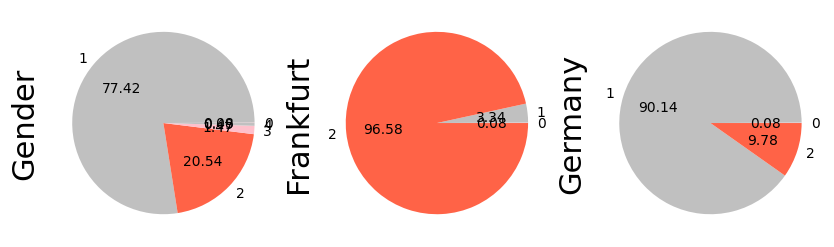

In [174]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10, 5))
# Defining colors for the pie chart
colors = ['pink', 'silver', 'tomato']

answers.groupby('gender').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 10},ax=ax1,colors=colors)
answers.groupby('Frankfurt').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 10}, ax=ax2,colors=colors)
answers.groupby('Germany').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 10}, ax=ax3, colors=colors)

ax1.set_ylabel('Gender', size=22)
ax2.set_ylabel('Frankfurt', size=22)
ax3.set_ylabel('Germany', size=22)

plt.show()

In [139]:
ratings_gender = pd.DataFrame.transpose(answers.groupby('v_51').mean().iloc[:,2:])
ratings_FFM = pd.DataFrame.transpose(answers.groupby('v_56').mean().iloc[:,2:])
ratings_germany = pd.DataFrame.transpose(answers.groupby('v_67').mean().iloc[:,2:])
# rename columns
ratings_FFM.rename(columns = {'0': '??', '1': 'female','2': 'male', '3': 'divers','4': 'no_entry'})
ratings_FFM.rename(columns = {'0': '??', '1': 'FFM','2': 'noFFM'})
ratings_FFM.rename(columns = {'0': '??', '1': 'Germany','2': 'noGermany'})

In [141]:
ratings_germany

v_67,0,1,2
v_66_1,NaN,3.511628,3.750000
v_66_2,NaN,2.790698,NaN
v_66_3,NaN,3.333333,5.000000
v_66_4,NaN,3.413043,3.125000
v_66_5,NaN,3.157895,3.875000
...,...,...,...
v_66_973,NaN,2.042553,1.500000
v_66_974,NaN,2.881356,3.500000
v_66_975,NaN,2.200000,1.428571
v_66_976,NaN,3.250000,4.200000


In [118]:
ratings.head()

,List-ID,image_score,n_ratings,Strassenname
v_66_1,1,3.531915,47,NaN
v_66_2,2,2.790698,43,NaN
v_66_3,3,3.378378,37,NaN
v_66_4,4,3.370370,54,NaN
v_66_5,5,3.282609,46,NaN


In [179]:
ratings = pd.merge(ratings, efs, on ='List-ID')

In [180]:
ratings['Strassenname'] = ratings['Name'].str.replace('.jpeg', '')

C:\Users\m-bau\AppData\Local\Temp\ipykernel_18248\3081496685.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ratings['Strassenname'] = ratings['Name'].str.replace('.jpeg', '')


In [181]:
ratings.head()

,List-ID,image_score,n_ratings,Strassenname,Name
0,1,3.531915,47,Germaniaplatz_60385,Germaniaplatz_60385.jpeg
1,2,2.790698,43,Usinger_Strasse_60389,Usinger_Strasse_60389.jpeg
2,3,3.378378,37,Langenselbolder_Strasse_60386,Langenselbolder_Strasse_60386.jpeg
3,4,3.370370,54,Vogelstrasse_60528,Vogelstrasse_60528.jpeg
4,5,3.282609,46,Bleichstrasse_60313,Bleichstrasse_60313.jpeg


In [182]:
ratings.to_csv(path + "ratings.csv", index= False)

In [124]:
ratings.shape


(977, 6)

In [127]:
ratings['image_score'].max()

4.173913043478261

In [128]:
ratings['image_score'].min()

1.5087719298245614